In [46]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.metrics import r2_score

In [47]:
X = 6 * np.random.rand(200, 1) - 3
y = 0.8 * X ** 2 + 0.9 * X + 2 + np.random.randn(200, 1)

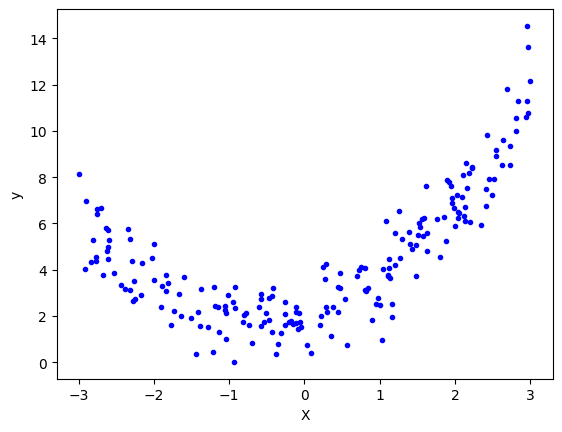

In [48]:
plt.plot(X, y, 'b.')
plt.xlabel('X')
plt.ylabel('y')
plt.show()

In [49]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

In [50]:
lr = LinearRegression()

In [51]:
lr.fit(X_train, y_train)

LinearRegression()

In [52]:
y_pred = lr.predict(X_test)
r2_score(y_test, y_pred)

0.21544357686597682

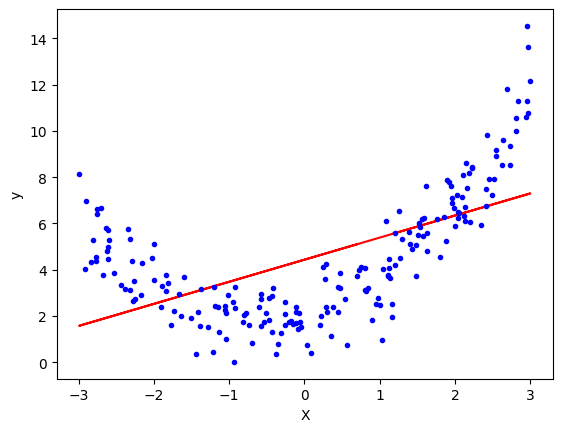

In [53]:
plt.plot(X_train, lr.predict(X_train), color='r')
plt.plot(X, y, 'b.')
plt.xlabel('X')
plt.ylabel('y')
plt.show()

In [54]:
poly = PolynomialFeatures(degree=2)

X_train_trans = poly.fit_transform(X_train)
X_test_trans = poly.transform(X_test)

In [55]:
print(X_train[0])
print(X_train_trans[0])

[0.70255857]
[1.         0.70255857 0.49358854]


In [56]:
lr = LinearRegression()
lr.fit(X_train_trans, y_train)

LinearRegression()

In [57]:
y_pred = lr.predict(X_test_trans)

In [58]:
r2_score(y_test, y_pred)

0.823094460000957

In [59]:
print(lr.coef_)
print(lr.intercept_)

[[0.         0.86674759 0.77208519]]
[2.00118584]


In [60]:
X_new = np.linspace(-3, 3, 200).reshape(200, 1)
X_new_poly = poly.transform(X_new)
y_new = lr.predict(X_new_poly)

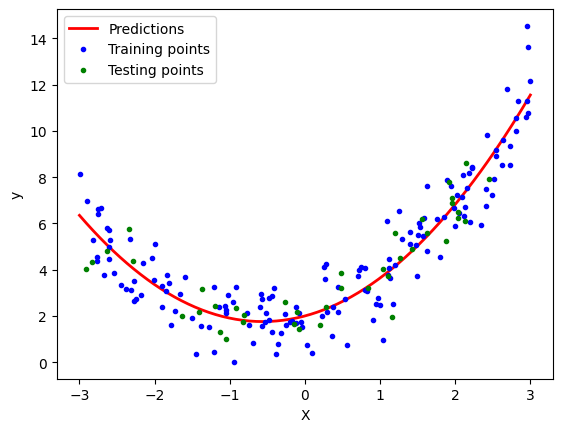

In [61]:
plt.plot(X_new, y_new, 'r-', linewidth = 2, label = 'Predictions')
plt.plot(X_train, y_train, 'b.', label = 'Training points')
plt.plot(X_test, y_test, 'g.', label = 'Testing points')
plt.xlabel('X')
plt.ylabel('y')
plt.legend()
plt.show()

In [62]:
# More than one input and one output

x = 7 * np.random.rand(100, 1) - 2.8
y = 7 * np.random.rand(100, 1) - 2.8

z = x**2 + y**2 + 0.2*x + 0.2*y + 0.1*x*y + 2 + np.random.randn(100, 1)

In [63]:
import plotly.express as px
df = px.data.iris()
fig = px.scatter_3d(df, x=x.ravel(), y=y.ravel(), z=z.ravel())
fig.show()

In [64]:
lr = LinearRegression()
lr.fit(np.array([x, y]).reshape(100, 2), z)

x_input = np.linspace(x.min(), x.max(), 10)
y_input = np.linspace(y.min(), y.max(), 10)
xGrid, yGrid = np.meshgrid(x_input, y_input)

final = np.vstack((xGrid.ravel().reshape(1, 100), yGrid.ravel().reshape(1, 100))).T

z_final = lr.predict(final).reshape(10, 10)

In [65]:
import plotly.graph_objects as go

fig = px.scatter_3d(df, x=x.ravel(), y=y.ravel(), z=z.ravel())

fig.add_trace(go.Surface(x = x_input, y = y_input, z = z_final))

fig.show()

In [66]:
X_multi = np.array([x, y]).reshape(100, 2)
X_multi.shape

(100, 2)

In [67]:
poly = PolynomialFeatures(degree=2)
X_multi_trans = poly.fit_transform(X_multi)

In [71]:
print('Input', poly.n_features_in_)
print('Output', poly.n_output_features_)
print('Powers\n', poly.powers_)

Input 2
Output 6
Powers
 [[0 0]
 [1 0]
 [0 1]
 [2 0]
 [1 1]
 [0 2]]


In [72]:
X_multi_trans.shape

(100, 6)

In [73]:
lr = LinearRegression()
lr.fit(X_multi_trans, z)

LinearRegression()

In [74]:
X_test_multi = poly.transform(final)

z_final = lr.predict(X_multi_trans).reshape(10, 10)

In [76]:
fig = px.scatter_3d(x=x.ravel(), y=y.ravel(), z=z.ravel())

fig.add_trace(go.Surface(x=x_input, y=y_input, z=z_final))

fig.update_layout(scene = dict(zaxis = dict(range = [0, 35])))

fig.show()